## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

In [24]:
# (1)
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D

def burgers(N):

    # Model Parameters
    xmin = -10.0   # left boundary
    xmax = +10.0   # right boundary
    tend = 10.0    # end time
    dtout = 1.0   # time interval for outputs

    # This will be my grid space.
    x = np.linspace(xmin, xmax, N+1)
    dx = (xmax - xmin) / (N)
    dt = 0.8 * dx
    U = np.zeros(N+1,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    # Begin the simulation.
    tout = t + dtout
    while t < tend:
        
        # Backup the previous time step.
        Uold = np.copy(U)

        # Find the state at the next time step.
        for ix in range(1, N):
               U[ix]=Uold[ix]-(dt/dx)*(Uold[ix]-Uold[ix-1])# Task: implement upwind method here.
        t += dt
        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout
    ax.legend()

    # plotting
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,10))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done.")
    plt.show()

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


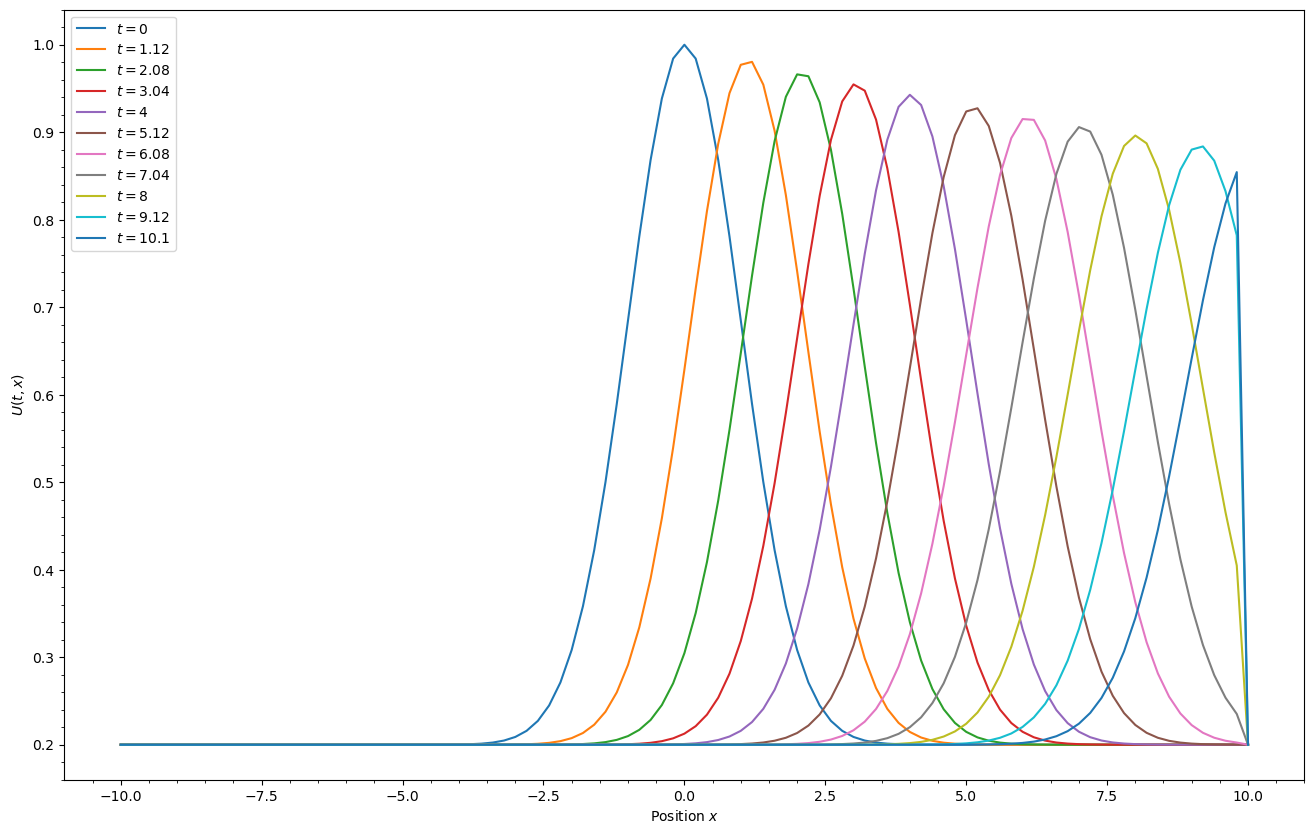

<Figure size 1600x1000 with 0 Axes>

In [26]:
burgers(100)

t =  1.0400000000000005
t =  2.0000000000000013
t =  3.0400000000000023
t =  4.000000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.040000000000005
t =  8.000000000000005
t =  9.040000000000006
t =  10.000000000000007
Done.


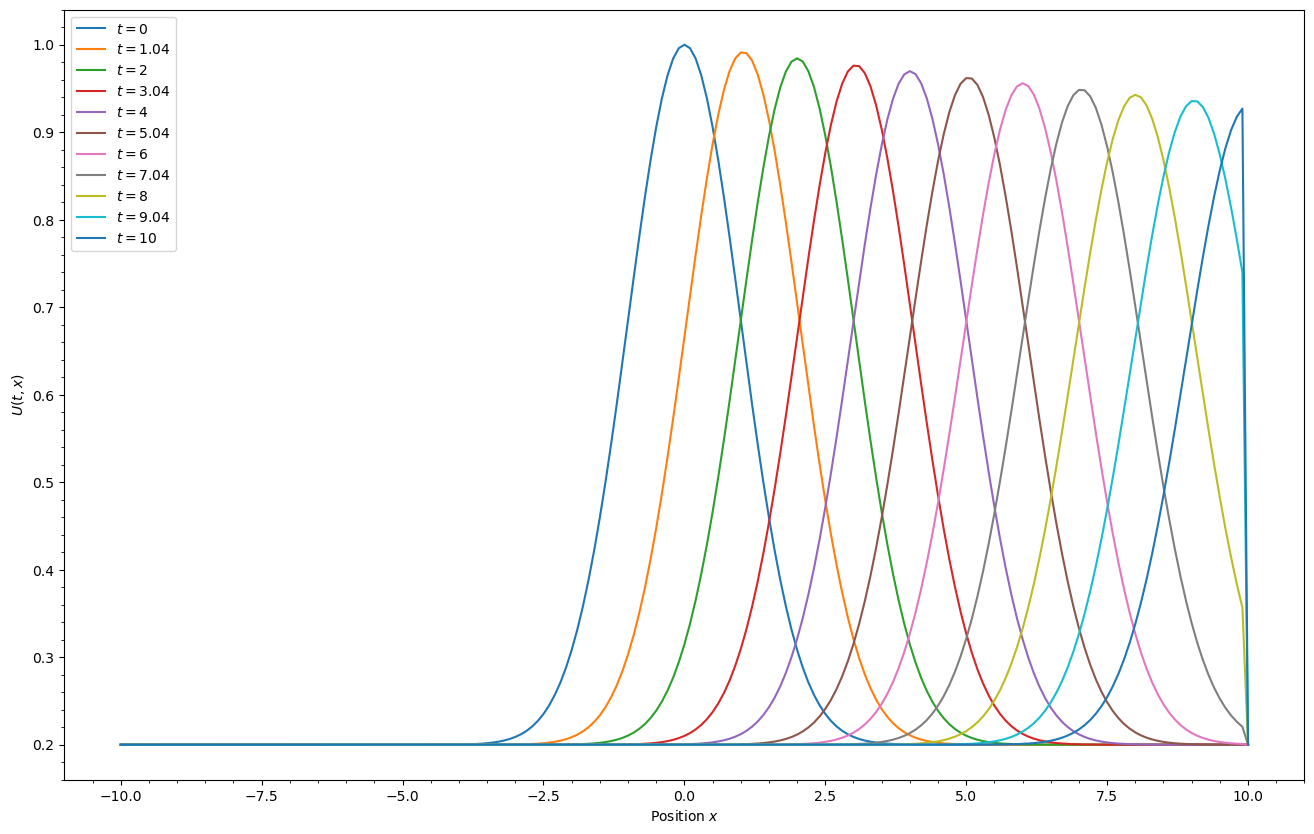

<Figure size 1600x1000 with 0 Axes>

In [28]:
burgers(200)

t =  1.0000000000000122
t =  2.000000000000041
t =  3.0015999999999305
t =  4.00159999999982
t =  5.00159999999971
t =  6.0015999999996
t =  7.00159999999949
t =  8.00159999999938
t =  9.00159999999927
t =  10.00159999999916
Done.


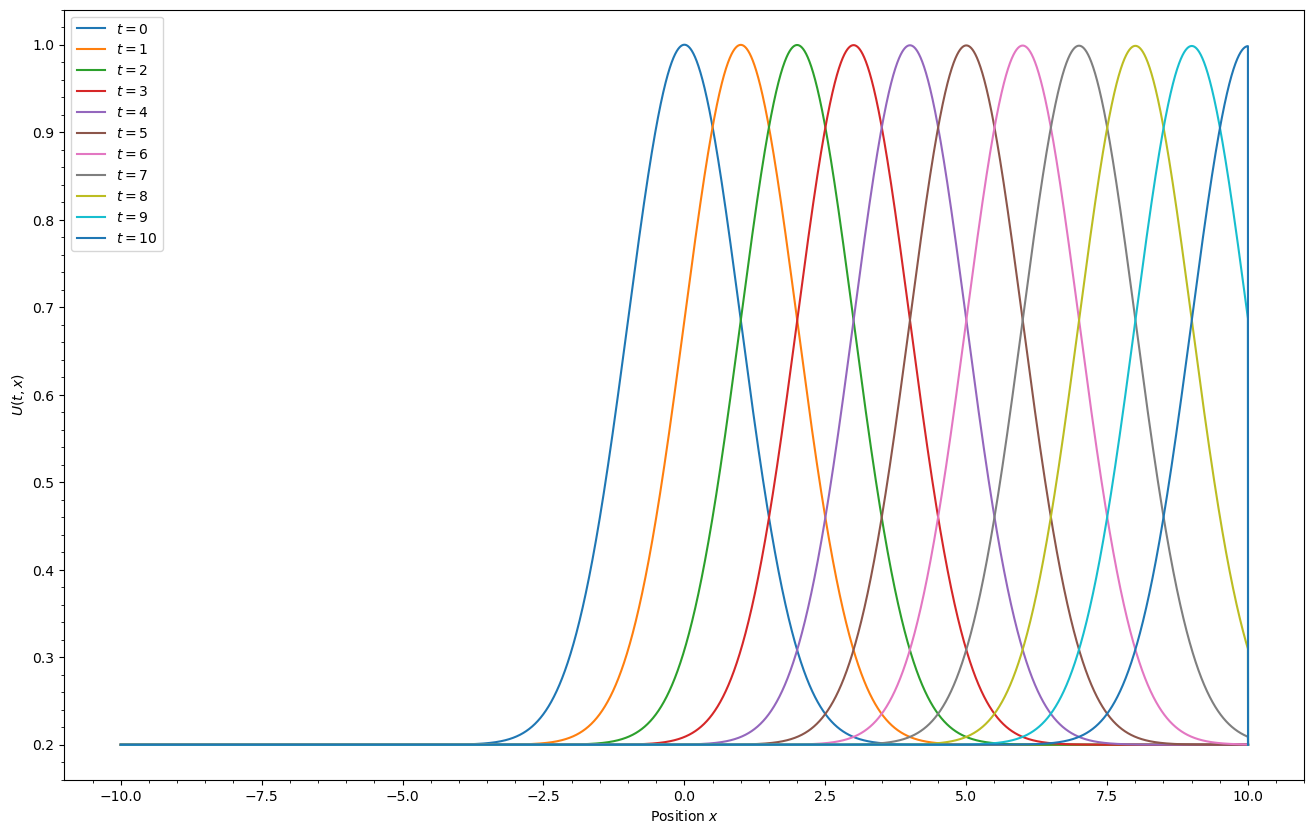

<Figure size 1600x1000 with 0 Axes>

In [29]:
burgers(10000)